In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

In [2]:
def get_z(step):
    # get redshift for each snap shot
    # LS start from a = 1/201 to 1 with 500 linearly spaced steps 
    a_step = 1/201. + (1 - 1/120)/500 * (step + 1)
    z_step = 1/a_step - 1

    return(z_step)

def get_err (pks,n_modes):
    # Error on pk
    return(pks/(np.sqrt(n_modes)))
    return(pk_err)

def plot_all_pkmm ():
    
    step = [331,338,347,355,365,373,382,392,401]

    fig, ax = plt.subplots(figsize = (8,5))
    for s in step:
        z = get_z(s)
        with h5py.File(f"LastJourneyData/pk_{s}.hdf5", "r") as f:
            # All pk files have the following format:
            # column 0: ks [h Mpc^-1]
            # column 1: pk [(h^-1 Mpc)^3]
            # column 2: number of k modes in bin
            # matter-matter auto-spectrum
            pks_mm = f['pk_mm'][:]
            ks = pks_mm[:,0]
            pks = pks_mm[:,1]
            n_modes = pks_mm[:,2]
            k_mask = (ks < 3)
            ks = ks[k_mask]
            pks = pks[k_mask]

        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.set(title = 'LastJourney pkmm')
        ax.plot(ks,pks,label =f'z = {z:.2f}')
        ax.set_xlim(ks[0],ks[-1])
        ax.set_xlabel(r'$k[hMpc^{-1}]$',fontsize = 15)
        ax.set_ylabel(r'$P(k) [h^{-3}Mpc^3]$',fontsize = 15)
        ax.tick_params(labelsize=13)

    ax.axvline(1.9,color = 'red',ls = '--',label = 'Nyquist freq')
    ax.axvline(1.5,color = 'black',ls = '--',label = 'Chosen max range')
    ax.legend(fontsize = 12,frameon = False)
    
def plot_pkic ():
    
    ic_data = np.loadtxt('LastJourneyData/m000p.pk.ini')
    ks_ic = ic_data[:,0]
    pks_ic = ic_data[:,1]
    pks_err_ic = ic_data[:,2]
    ks_ic_mask = ks_ic < 1.5
    f,ax = plt.subplots(figsize = (8,6))
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set(title = 'LastJourney pk_ICIC')
    ax.errorbar(ks_ic[ks_ic_mask],pks_ic[ks_ic_mask],pks_err_ic[ks_ic_mask])
    ax.set_xlabel(r'$k[hMpc^{-1}]$',fontsize = 15)
    ax.set_ylabel(r'$P(k) [h^{-3}Mpc^3]$',fontsize = 15)
    

def plot_halo (step):
    fig, ax = plt.subplots(2,1,figsize = (8,9))
    plt.subplots_adjust(hspace=0.0)
    z = get_z(step)

    with h5py.File(f"LastJourneyData/pk_{step}.hdf5", "r") as f:
        
        for mb in range(4):
 
            ds_hh = f[f'pk_hh_massbin_{mb}']  # auto-spectra dataset
            ds_hm = f[f'pk_hm_massbin_{mb}']  # cross-spectra dataset

            # mass range and number of halos/matter particles for print statement
            mass_lo = np.log10(ds_hh.attrs['delta1_mass_low'])  # log10(M200c)
            mass_hi = np.log10(ds_hh.attrs['delta1_mass_high'])  # log10(M200c)
            nparts_h = ds_hh.attrs['delta1_nparts']  # number of halos
            nparts_m = ds_hm.attrs['delta2_nparts']  # number of particles for matter cross
            print(f"mass bin {mb} ({mass_lo}, {mass_hi}): nhalos={nparts_h:8d} nparticles={nparts_m:12d}")
            pks_hh = ds_hh[:]
            ks_hh = pks_hh[:,0]
            pks_hh = pks_hh[:,1]
            ks_hh_mask = ks_hh < 0.9
            pks_hm = ds_hm[:]
            ks_hm = pks_hm[:,0]
            pks_hm = pks_hm[:,1]
            ks_hm_mask = ks_hm < 0.9
            ax[0].set_xscale("log")
            ax[0].set_yscale("log")
            ax[0].set(title = f'LastJourney pkhh pkhm at z = {z:.2f}')
            ax[0].plot(ks_hh[ks_hh_mask],pks_hh[ks_hh_mask],label =f"mass bin {mb} ({mass_lo}, {mass_hi})")

            ax[1].set_xscale("log")
            ax[1].set_yscale("log")
            #ax[1].set(title = f'LastJourney pkhm at z = {z:.2f}')
            ax[1].plot(ks_hm[ks_hm_mask],pks_hm[ks_hm_mask],label =f"mass bin {mb} ({mass_lo}, {mass_hi})")

        ax[1].set_xlabel(r'$k[hMpc^{-1}]$',fontsize = 15)
        ax[0].set_ylabel(r'$P_{hh}(k) [h^{-3}Mpc^3]$',fontsize = 15)
        ax[1].set_ylabel(r'$P_{hm}(k) [h^{-3}Mpc^3]$',fontsize = 15)
        for axes in ax:
            axes.tick_params(labelsize=13)
            axes.legend(fontsize = 12,frameon = False)

mass bin 0 (12.0, 12.5): nhalos=61966321 nparticles= 12429610132
mass bin 1 (12.5, 13.0): nhalos=30319968 nparticles= 12429610132
mass bin 2 (13.0, 13.5): nhalos= 8882980 nparticles= 12429610132
mass bin 3 (13.5, 14.0): nhalos= 2077316 nparticles= 12429610132


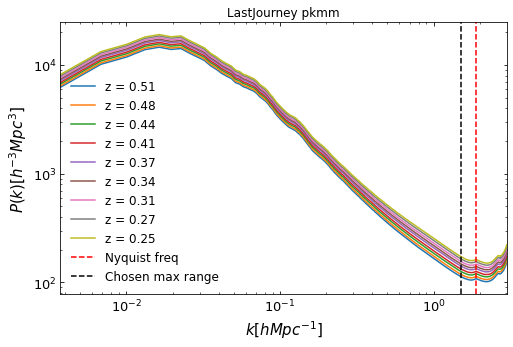

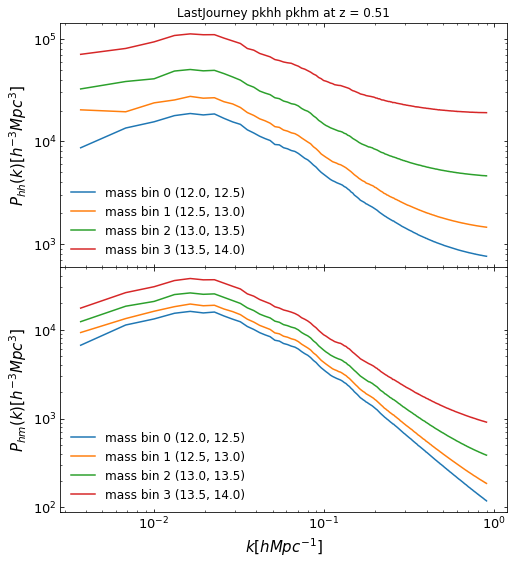

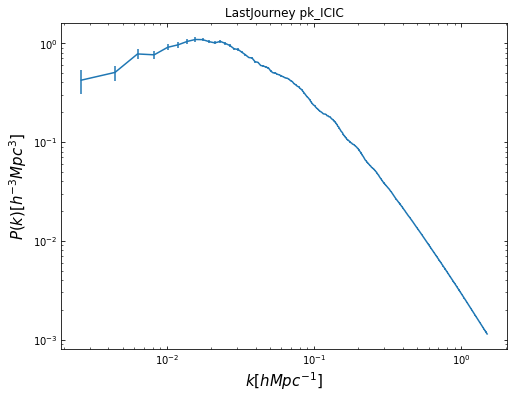

In [3]:
plot_all_pkmm()
plot_halo(331)
plot_pkic()